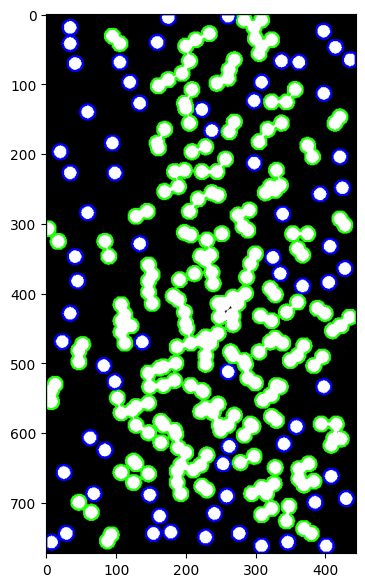

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# 載入圖片
image = cv2.imread('./exam2.jpg')
# 轉灰階
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 二值化
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

single_area = 375

# 尋找圖形輪廓
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    # 找面積
    area = cv2.contourArea(c)
    # 尋找重疊數量
    blob_area = math.ceil(area/single_area)
    # 標記重疊與非重疊
    if blob_area > 1:
        cv2.drawContours(image, [c], -1, (36,255,12), 2)
    else:
        cv2.drawContours(image, [c], -1, (0,0,255), 2)

plt.figure(figsize=(10, 7))
plt.imshow(image)